In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
%matplotlib inline

/Users/peterwooldridge/repos/tensor_flow_tutorials/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/peterwooldridge/repos/tensor_flow_tutorials/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/peterwooldridge/repos/tensor_flow_tutorials/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16"

1.14.0


In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

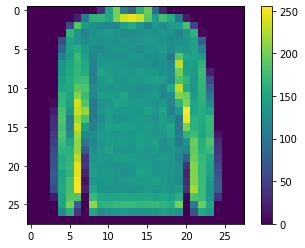

In [11]:
plt.figure()
plt.imshow(train_images[45])
plt.colorbar()
plt.grid(False)
plt.show()

scale data 

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

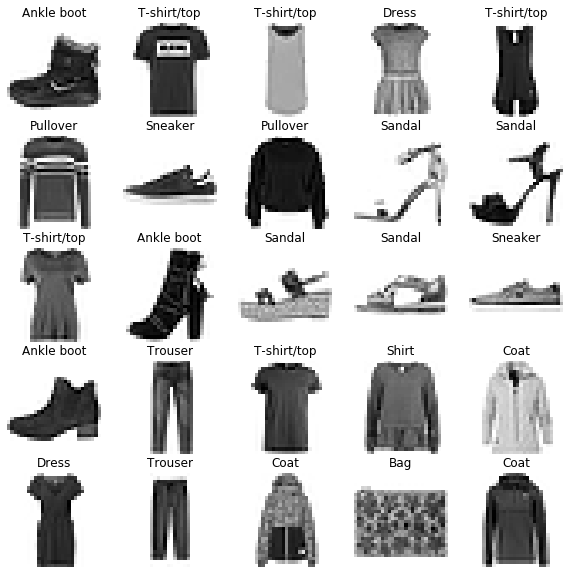

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.5023 - acc: 0.8232
Epoch 2/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3731 - acc: 0.86420s - loss: 0.3738 - acc: 0.8
Epoch 3/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3374 - acc: 0.8769
Epoch 4/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3108 - acc: 0.8869
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2928 - acc: 0.8917


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.3403 - acc: 0.8777
Test accuracy: 0.8777


In [17]:
predictions = model.predict(test_images)

In [18]:
np.argmax(predictions[0])

9

In [62]:
def plt_bar(i, predictions, actuals):
    prediction = predictions[i]
    actual = actuals[i]
    plt.grid = False
    max_pred = np.argmax(prediction)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    bplt = plt.bar(range(10), prediction, color="#777777")
    bplt[max_pred].set_color('red')
    bplt[actual].set_color('blue')

def plt_img(i, preds, actuals, img):
    im = img[i]
    p = preds[i]
    predmx = np.argmax(p)
    actual = actuals[i]
    
    colour = "blue" if predmx == actual else "red"
    
    plt.imshow(im, cmap=plt.cm.binary)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"{class_names[predmx]} {np.round(np.max(p)*100,2)}% ({class_names[actual]})", color=colour)

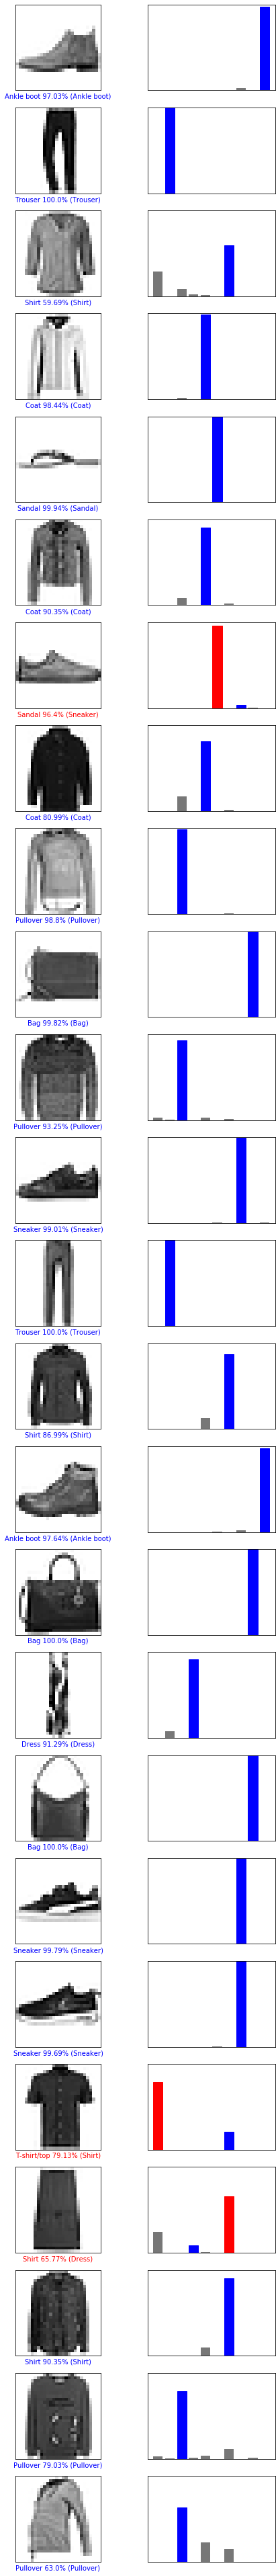

In [63]:
plt.figure(figsize=(7.5,70))
for plt_num in range(0, 50, 2):
    plt.subplot(25,2,plt_num+1)
    plt_img(plt_num, predictions, test_labels, test_images)
    plt.subplot(25,2,plt_num+2)
    plt_bar(plt_num, predictions, test_labels)